### Calling Libraries

In [42]:
import numpy as np 
import pandas as pd
from   datetime import datetime 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import missingno 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from itertools import chain

import re

### File Loading

In [2]:
Data= pd.read_csv('../input/titanic-data/train.csv')
len(Data['Age']) - Data['Age'].value_counts().sum()

Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
Data.Sex.value_counts().male

577


### Data Inspection & Pre-processing

In [4]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
Data.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

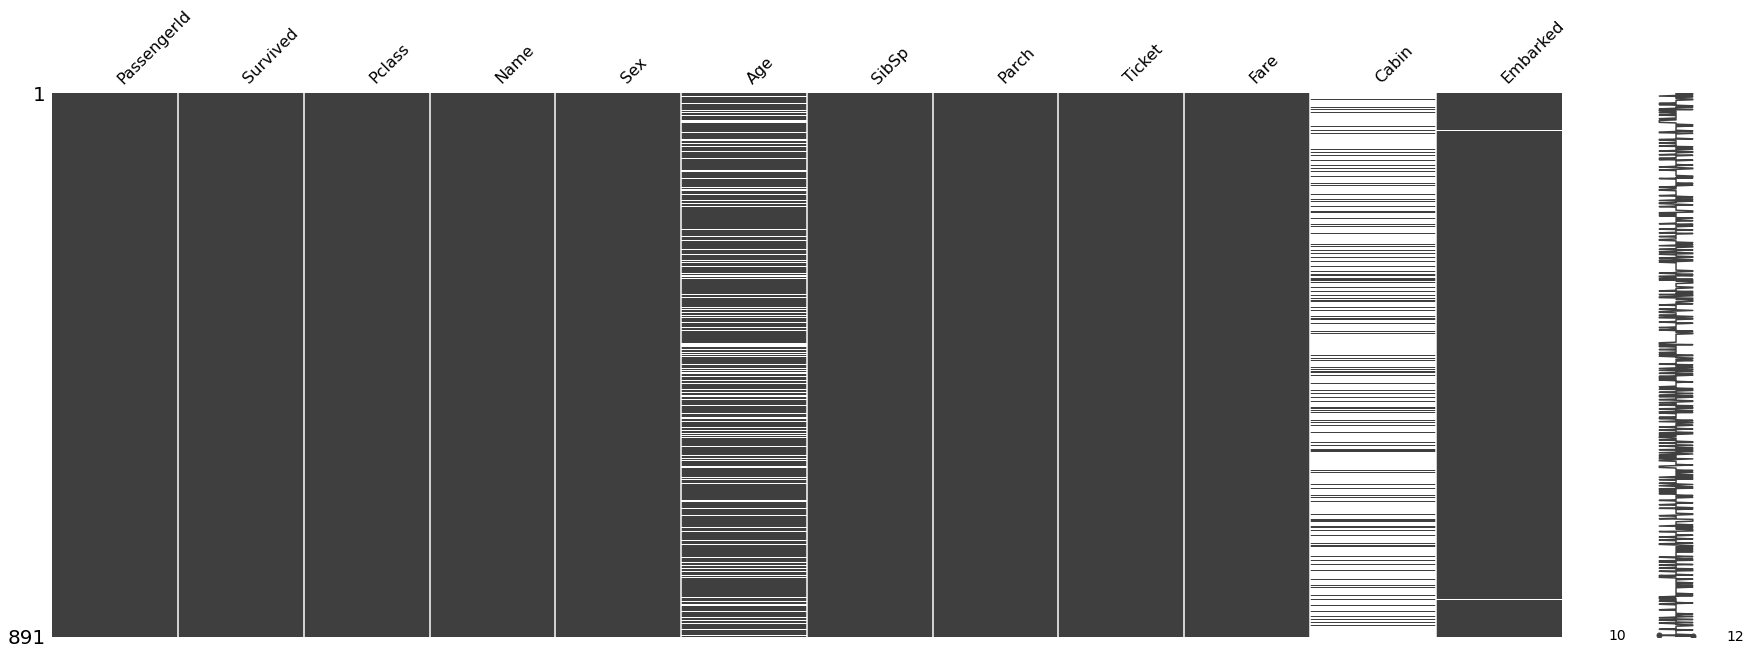

In [6]:
missingno.matrix(Data, figsize=(30, 10))

Let's Fill the NaN Values of age with the average value of all ages of the dataset

In [7]:
Averaged_Age= Data['Age'].mean()

Data['Age']= Data['Age'].fillna(Averaged_Age)

Let's drop columns that we don't need & that will not affect on our prediction

In [8]:
Data.drop(columns=['PassengerId','Name', 'Ticket', 'Cabin'], inplace= True)


In [9]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Let's see the relationship between Survived column with other columns

<AxesSubplot:xlabel='count', ylabel='Survived'>

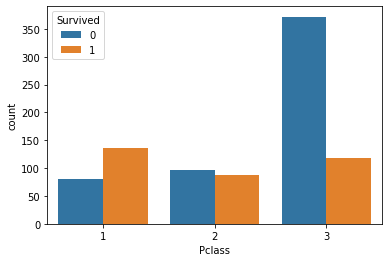

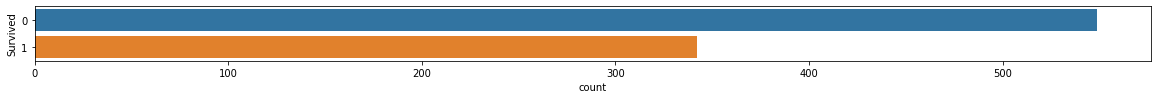

In [10]:
sns.countplot(x= 'Pclass', data= Data, hue='Survived')

fig= plt.figure(figsize=(20, 1))
sns.countplot(y= 'Survived', data= Data)




/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pclass', ylabel='Density'>

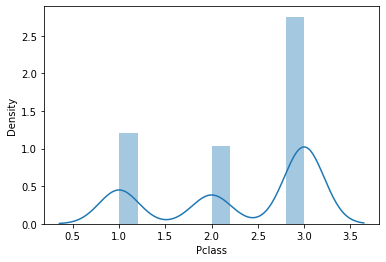

In [11]:
sns.distplot(Data['Pclass'])

We notice, that the number of not survived people is greater in Pclass 3, and the number of survived people is greater in Pclass 1 

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

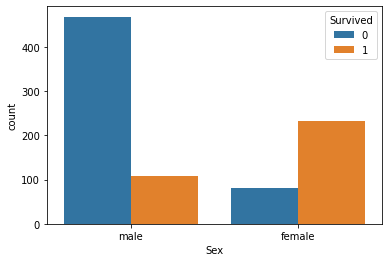

In [12]:
sns.countplot(x= 'Sex', data= Data, hue='Survived')
Data.groupby('Survived')['Sex'].value_counts()

It's clear, that the most number of dead people is considered from males.

<AxesSubplot:xlabel='Embarked', ylabel='count'>

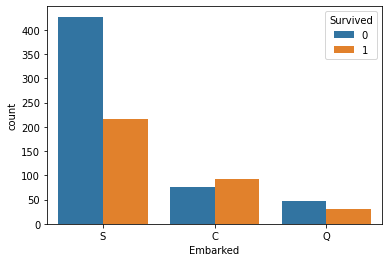

In [13]:
sns.countplot(x= 'Embarked', data= Data, hue='Survived')

It's clear, that Embarked S has the most number of dead and survived people.

<AxesSubplot:xlabel='Parch', ylabel='count'>

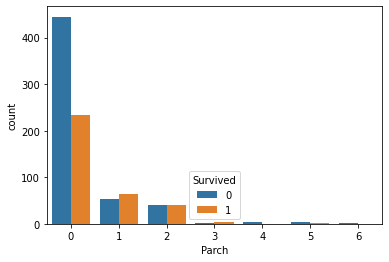

In [14]:
sns.countplot(x= 'Parch', data= Data, hue='Survived')

We notice that there is a huge number of Parents and Children that were dead

<AxesSubplot:xlabel='Survived', ylabel='count'>

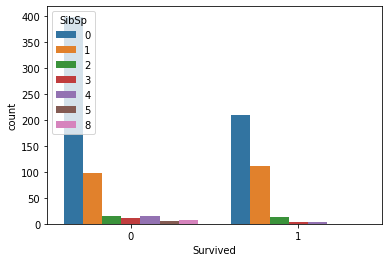

In [15]:
sns.countplot(x= 'Survived', data= Data, hue='SibSp')

We notice that passengers had Sibilings that were dead 

<AxesSubplot:>

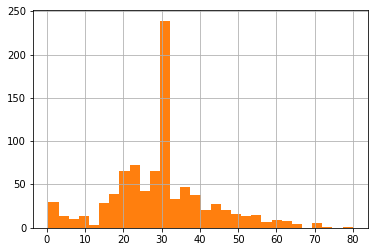

In [16]:
plt.hist(Data['Age'], bins= 30)

Data['Age'].hist(bins= 30)

Note that people of age 29-32 years old, have the greater number of death

In [17]:
Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


###### Let's Convert Categoral variables into numeric variables(0,1)

In [18]:
from sklearn.preprocessing import LabelEncoder #Woooooooow

L_E = LabelEncoder()

Data['Sex']=       L_E.fit_transform(Data['Sex'] )
Data['Embarked']=  L_E.fit_transform(Data['Embarked'])


In [19]:
Data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


### Let's Build Our Model

###### Data split

In [20]:
y= Data['Survived']
X= Data.drop( columns=['Survived'])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###### Model Training

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
Model= LogisticRegression()

In [25]:
Model.fit(X_train, y_train)

LogisticRegression()

###### Model prediction

In [26]:
y_Predicted= Model.predict(X_test)

In [27]:
y_Predicted

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0])

In [28]:
y_test.values

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0])

###### Model Evaluation

In [29]:
from sklearn.metrics import classification_report    
from sklearn.metrics import confusion_matrix 

In [30]:
Model.score(X_test, y_test)

0.8169491525423729

In [31]:
print(classification_report(y_test, y_Predicted))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       175
           1       0.80      0.73      0.77       120

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295



In [32]:
confusion_matrix(y_test, y_Predicted)

array([[153,  22],
       [ 32,  88]])

In [33]:
# Now we can do a prediction and see the result
Model.predict([[ 0,0,20,1,1,100,2

]]
) 


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [34]:
Test= pd.read_csv("../input/titanic-data/test.csv")

In [35]:
Test.drop(columns=['PassengerId', 'Name',  'Cabin'], inplace= True)

In [36]:
T_Averaged_Age= Test['Age'].mean()

Test['Age']= Test['Age'].fillna(T_Averaged_Age)
Test['Fare']= Test['Fare'].fillna(Test['Fare'].mean())

In [37]:
L_E = LabelEncoder()

Test['Sex']=       L_E.fit_transform(Test['Sex'] )
Test['Embarked']=  L_E.fit_transform(Test['Embarked'])

In [38]:
del(Test['Ticket'])

In [39]:
# Now we can perform our predictions
Predictions= Model.predict(Test)


In [40]:
My_Predictions= pd.DataFrame(Predictions,index=[i for i in range(len(Predictions))], columns=['Survived'])

In [ ]:
# To Save your file into your PC
My_Predictions.to_csv('D:\Titanic Survivals Predictions.csv', index= False)